### 1. Loading the Data

In this step, we will load the datasets required for fraud detection analysis. We have two datasets:
1. **Fraud_Data.csv**: Contains the transaction information, including user details and whether the transaction is fraudulent.
2. **IpAddress_to_Country.csv**: Maps IP address ranges to countries, which will help us enhance the fraud detection by identifying geographical locations of transactions.

In [9]:
# Importing necessary libraries
import pandas as pd

# Load datasets
fraud_data = pd.read_csv('../Data/Raw/Fraud_Data.csv')
ip_data = pd.read_csv('../Data/Raw/IpAddress_to_Country.csv')

# Display first few rows of Fraud Data
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [10]:
# Display first few rows of Ip Data
ip_data.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


### 2. Data Cleaning

Data cleaning is a crucial step to ensure that our dataset is free from errors and inconsistencies. In this step, we will:
- Handle missing values by removing or imputing them.
- Remove any duplicate rows to avoid biased analysis.
- Correct data types for certain columns, such as date-time and IP address conversion to integer format.

In [11]:
# Check for missing values
fraud_data.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [12]:
# Check for missing values
ip_data.isnull().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

In [13]:
# Remove duplicate rows
fraud_data = fraud_data.drop_duplicates()

In [14]:
# Remove duplicate rows
ip_data = ip_data.drop_duplicates()

In [15]:
# Correct data types
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
fraud_data['ip_address'] = fraud_data['ip_address'].astype('int')

# Display cleaned data information
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  int64         
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 12.7+ MB


### 3. Exploratory Data Analysis (EDA)

EDA helps us understand the underlying patterns in the data. Here, we will:
- Conduct **Univariate Analysis** to explore individual variables.
- Perform **Bivariate Analysis** to explore relationships between features, especially how they correlate with fraudulent transactions.

### 3.1 Univariate Analysis for `Fraud_Data.csv`

Univariate analysis is performed for each individual variable to understand its distribution. We will analyze both **numerical** and **categorical** features.

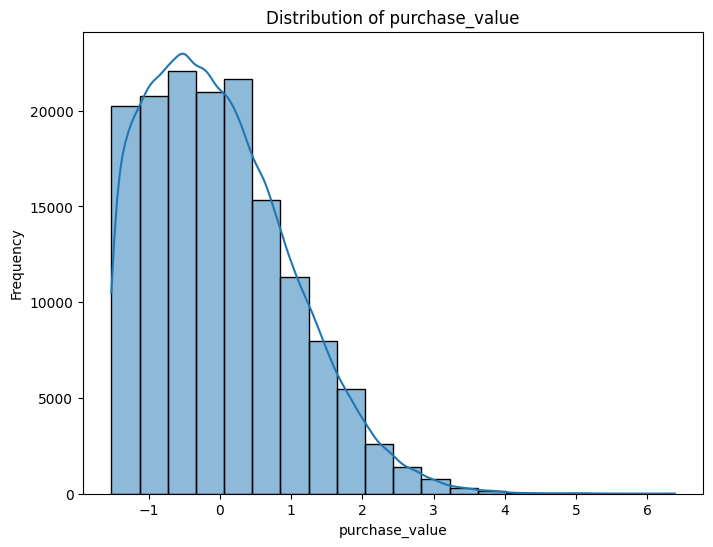

Descriptive Statistics for purchase_value:
count    1.511120e+05
mean     4.006184e-17
std      1.000003e+00
min     -1.524632e+00
25%     -8.151294e-01
50%     -1.056270e-01
75%      6.584524e-01
max      6.389048e+00
Name: purchase_value, dtype: float64




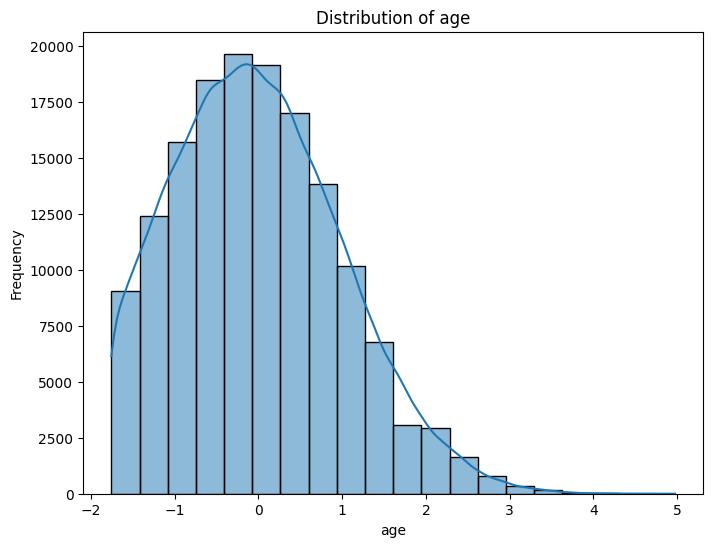

Descriptive Statistics for age:
count    1.511120e+05
mean     8.614235e-17
std      1.000003e+00
min     -1.756930e+00
25%     -7.125683e-01
50%     -1.632727e-02
75%      6.799138e-01
max      4.973400e+00
Name: age, dtype: float64




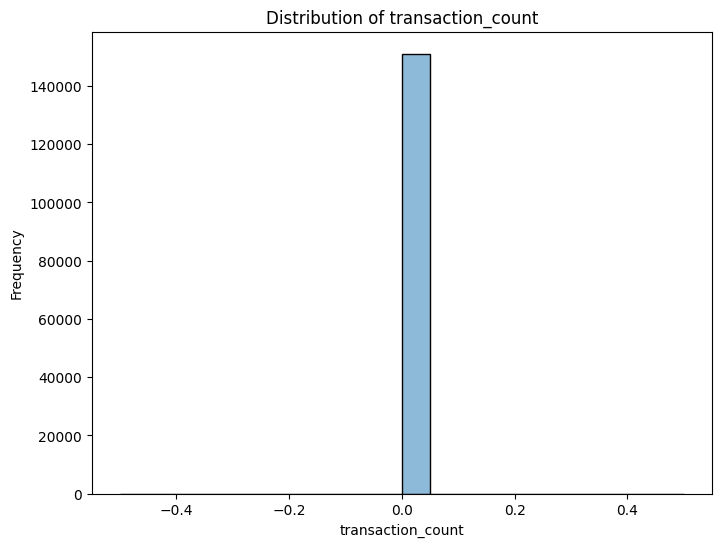

Descriptive Statistics for transaction_count:
count    151112.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: transaction_count, dtype: float64




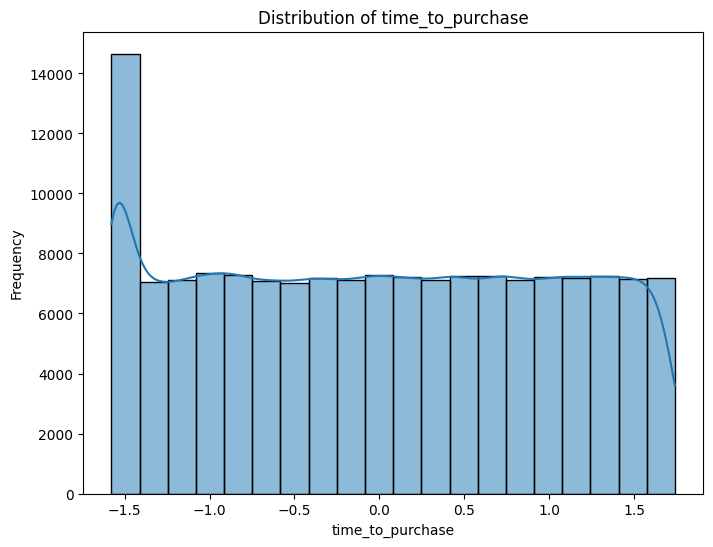

Descriptive Statistics for time_to_purchase:
count    1.511120e+05
mean    -1.034461e-16
std      1.000003e+00
min     -1.577617e+00
25%     -8.781362e-01
50%     -1.818071e-03
75%      8.676506e-01
max      1.738805e+00
Name: time_to_purchase, dtype: float64




ValueError: Could not interpret value `source` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis: Numerical Features
numerical_features = ['purchase_value', 'age', 'transaction_count', 'time_to_purchase']
for feature in numerical_features:
    plt.figure(figsize=(8,6))
    sns.histplot(fraud_data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(f"Descriptive Statistics for {feature}:")
    print(fraud_data[feature].describe())
    print("\n")

# Univariate Analysis: Categorical Features
categorical_features = ['source', 'browser', 'sex', 'class']  # class is the target variable
for feature in categorical_features:
    plt.figure(figsize=(8,6))
    sns.countplot(x=feature, data=fraud_data)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

### 3.2 Univariate Analysis for `IpAddress_to_Country.csv`

We will analyze the IP address ranges and the distribution of countries in the dataset.

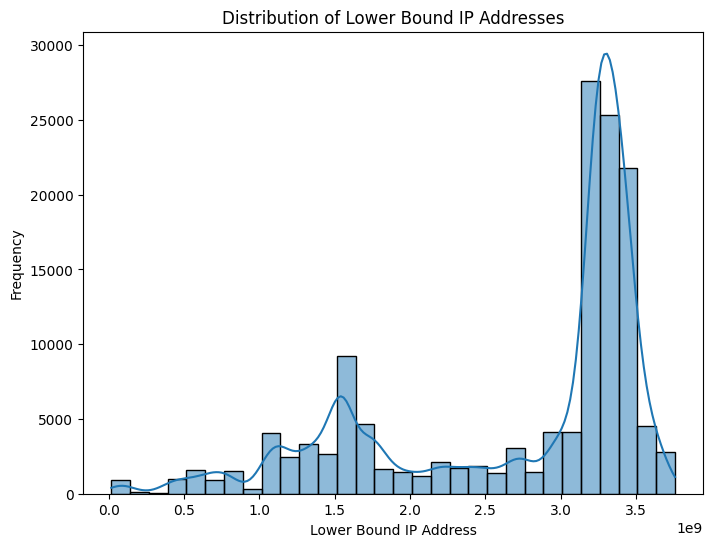

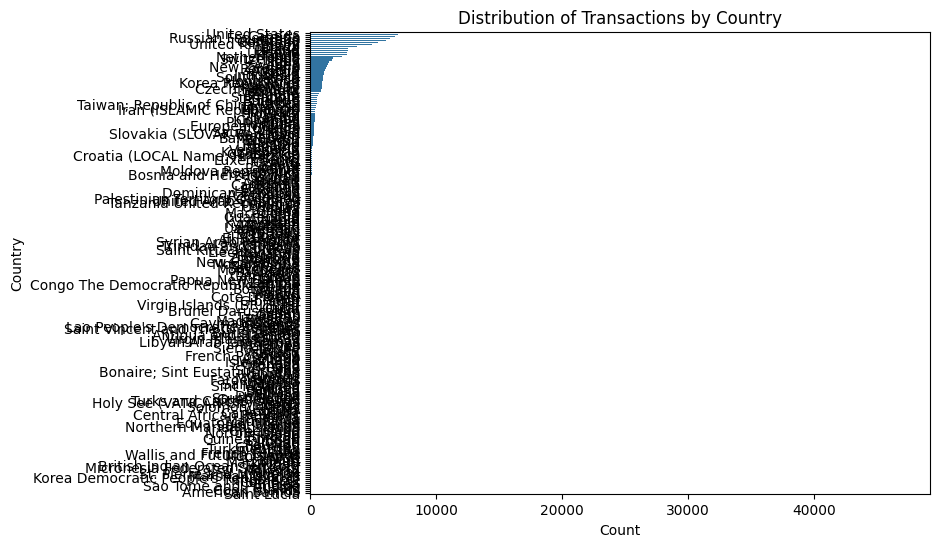

In [18]:
# Univariate Analysis for IP address ranges and countries
plt.figure(figsize=(8,6))
sns.histplot(ip_data['lower_bound_ip_address'], bins=30, kde=True)
plt.title('Distribution of Lower Bound IP Addresses')
plt.xlabel('Lower Bound IP Address')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(y='country', data=ip_data, order=ip_data['country'].value_counts().index)
plt.title('Distribution of Transactions by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


### 3.3 Bivariate Analysis for `Fraud_Data.csv`

Bivariate analysis helps to understand relationships between the **target variable (`class`)** and other features. Here, we will explore:
- Numerical features vs. Fraud Status (Class)
- Categorical features vs. Fraud Status (Class)


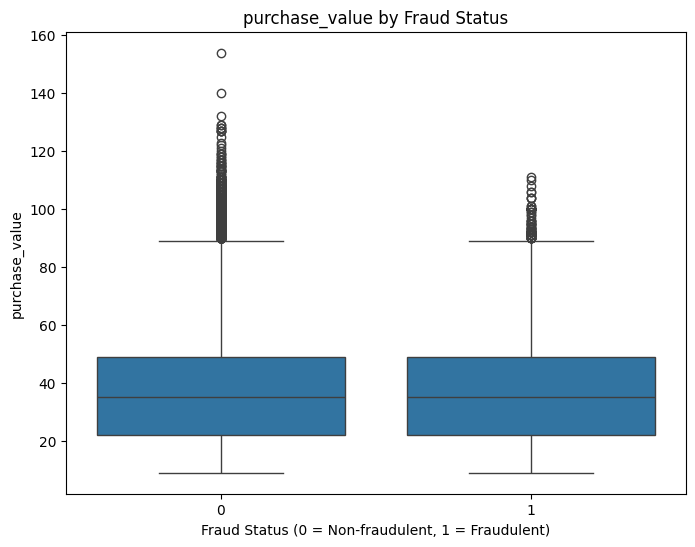

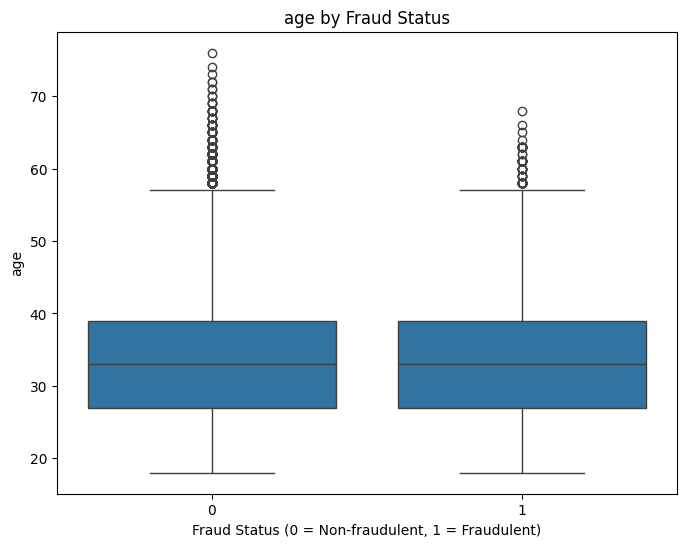

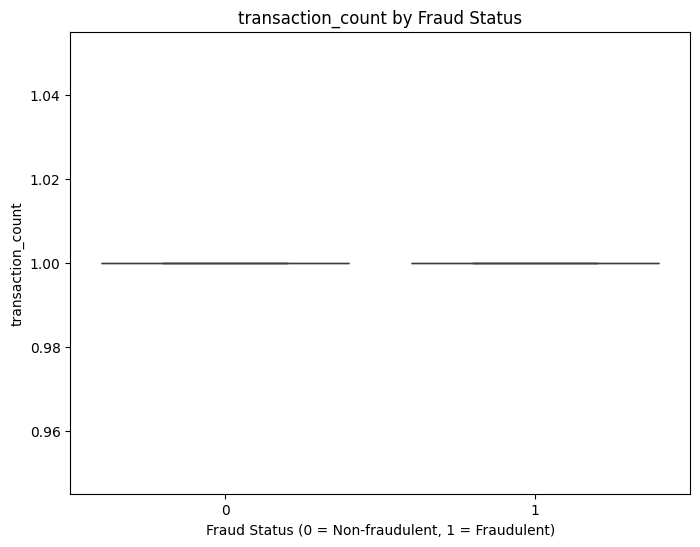

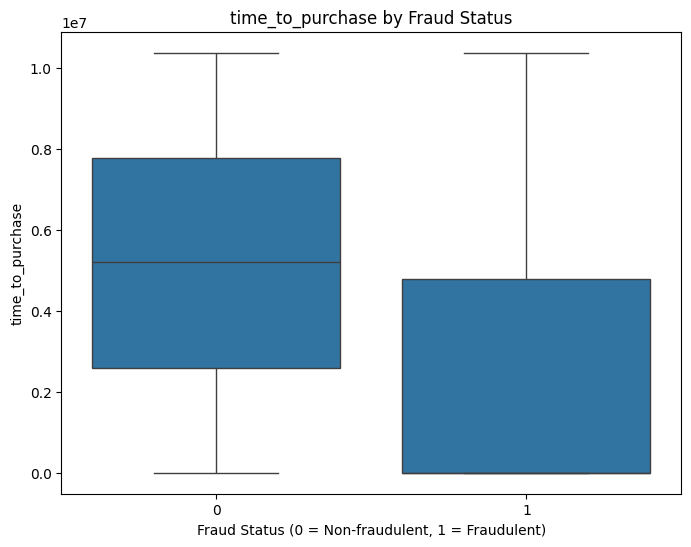

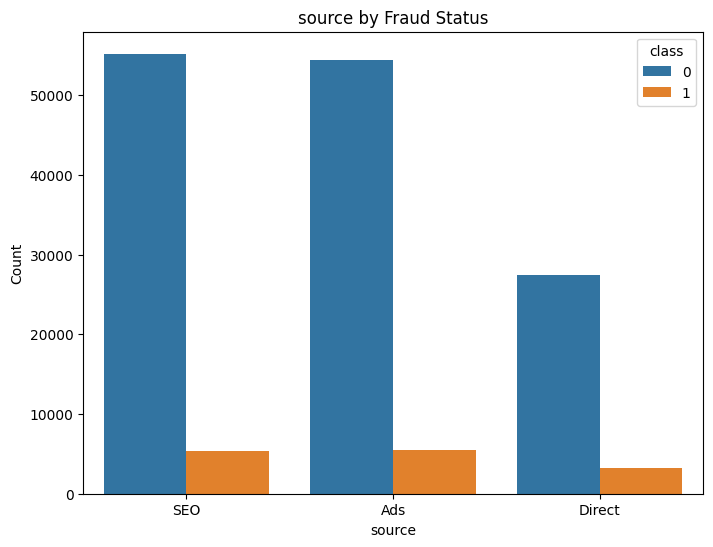

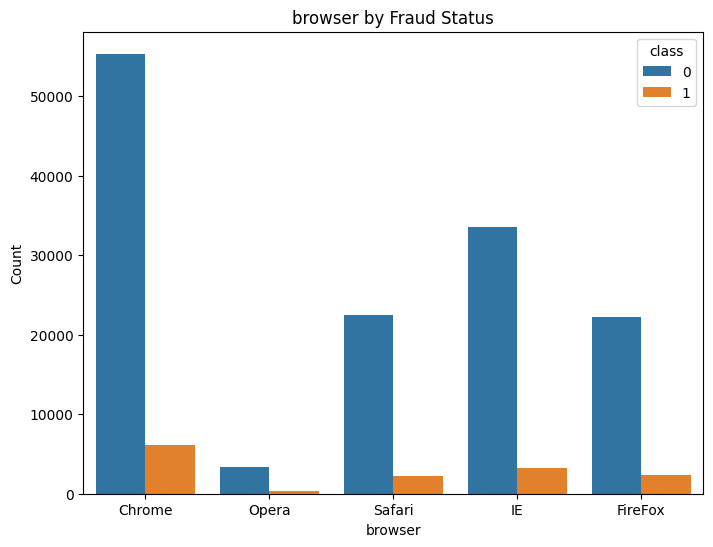

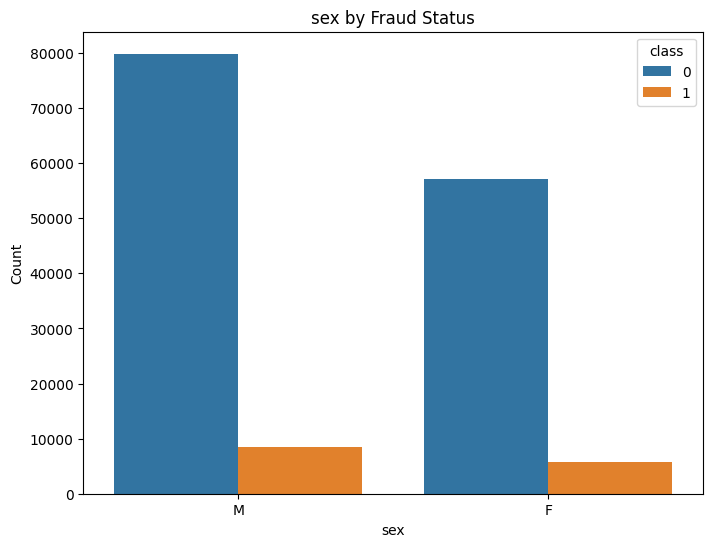

In [19]:
# Bivariate Analysis: Numerical Features vs. Fraud Status
for feature in numerical_features:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='class', y=feature, data=fraud_data)
    plt.title(f'{feature} by Fraud Status')
    plt.xlabel('Fraud Status (0 = Non-fraudulent, 1 = Fraudulent)')
    plt.ylabel(feature)
    plt.show()

# Bivariate Analysis: Categorical Features vs. Fraud Status
for feature in categorical_features[:-1]:  # Exclude 'class' itself
    plt.figure(figsize=(8,6))
    sns.countplot(x=feature, hue='class', data=fraud_data)
    plt.title(f'{feature} by Fraud Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


### 3.4 Geographical Bivariate Analysis

By merging the `fraud_data` with the `IpAddress_to_Country.csv`, we can perform geographical bivariate analysis. We'll explore how fraud cases are distributed across countries.


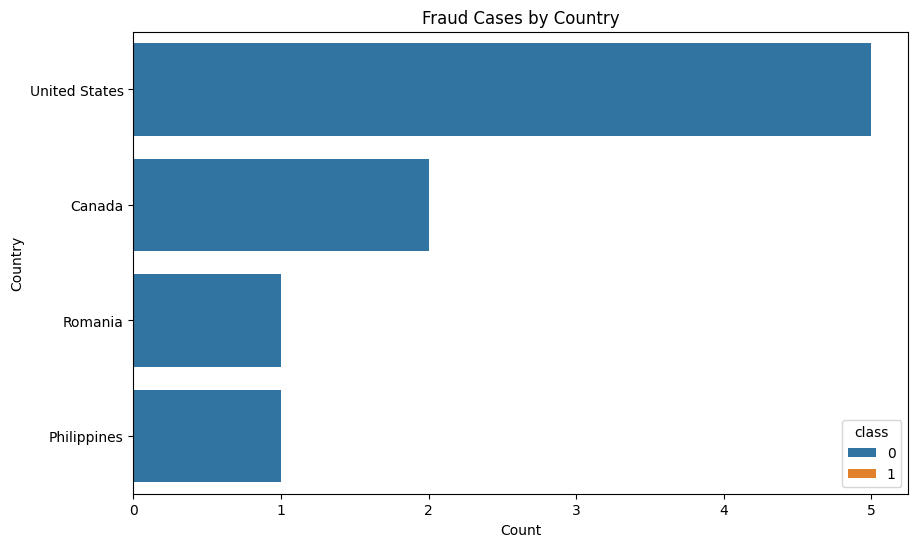

In [20]:
# Merge fraud_data with ip_data to include country
fraud_geo = fraud_data.merge(ip_data[['lower_bound_ip_address', 'country']], 
                             how='left', 
                             left_on='ip_address', 
                             right_on='lower_bound_ip_address')

# Bivariate Analysis: Country vs. Fraud Status
plt.figure(figsize=(10,6))
sns.countplot(y='country', hue='class', data=fraud_geo, order=fraud_geo['country'].value_counts().index)
plt.title('Fraud Cases by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

### 4. Geolocation Analysis

By merging the IP address data, we can incorporate geographical information into our fraud detection model. First, we convert IP addresses into an integer format and then merge the `fraud_data` with `ip_data` to add country information.

In [21]:
# Convert IP address to integer range for merging
fraud_data = fraud_data.merge(ip_data, how='left', left_on='ip_address', right_on='lower_bound_ip_address')

# Display the merged dataset
fraud_data[['ip_address', 'country']].head()

,ip_address,country
0,732758368,NaN
1,350311387,NaN
2,2621473820,NaN
3,3840542443,NaN
4,415583117,NaN


### 5. Feature Engineering

In this step, we create new features that can provide more insight into fraudulent behavior:
- **Time-based features**: Extract hour of the day and day of the week from `purchase_time`.
- **Transaction count**: Count the number of transactions per user.
- **Transaction velocity**: Calculate the time difference between signup and purchase.

In [16]:
# Create time-based features
fraud_data['transaction_hour'] = fraud_data['purchase_time'].dt.hour
fraud_data['transaction_day'] = fraud_data['purchase_time'].dt.dayofweek

# Transaction count per user
fraud_data['transaction_count'] = fraud_data.groupby('user_id')['purchase_time'].transform('count')

# Transaction velocity (time between signup and purchase)
fraud_data['time_to_purchase'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds()

# Display updated dataframe with new features
fraud_data[['transaction_hour', 'transaction_day', 'transaction_count', 'time_to_purchase']].head()


,transaction_hour,transaction_day,transaction_count,time_to_purchase
0,2,5,1,4506682.0
1,1,0,1,17944.0
2,18,3,1,1.0
3,13,0,1,492085.0
4,18,2,1,4361461.0


### 6. Encoding Categorical Features and Scaling

For machine learning models to work efficiently, categorical features need to be converted into numeric format using one-hot encoding. Also, numerical features should be scaled so that they are on the same scale.

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# One-hot encoding categorical features
categorical_features = ['source', 'browser', 'sex']
fraud_data = pd.get_dummies(fraud_data, columns=categorical_features)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['purchase_value', 'age', 'transaction_count', 'time_to_purchase']
fraud_data[numerical_features] = scaler.fit_transform(fraud_data[numerical_features])

# Display final processed data
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,transaction_hour,transaction_day,...,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,0.679914,732758368,0,2,5,...,False,False,True,True,False,False,False,False,False,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,2.304476,350311387,0,1,0,...,True,False,False,True,False,False,False,False,True,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,2.304476,2621473820,1,18,3,...,False,False,True,False,False,False,True,False,False,True
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,0.911994,3840542443,0,13,0,...,False,False,True,False,False,False,False,True,False,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,1.376155,415583117,0,18,2,...,True,False,False,False,False,False,False,True,False,True


### 7. Save the Processed Data

After completing data preprocessing, we will save the cleaned and processed data to a new CSV file, which will be used for model training in the next steps.

In [23]:
# Save cleaned and processed data to a new file
fraud_data.to_csv('../Data/Processed/cleaned_fraud_data.csv', index=False)